**Regression**
>
> Regression is a statistical analysis technique used to model the relationship between a dependent variable and one or more independent variables.
> 
> There are different types of regression analysis, with linear regression being the most common. Linear regression is used to model the linear relationship between the independent variables and the dependent variable. However, the relationship may not always be linear, and there could be interactions between multiple independent variables. In such cases, other regression techniques such as polynomial regression, logistic regression, and others may be used.
>
> | Linear Regression | |
> |-|-|
> | Simple Linear Regression | → $Y = β_0 + β_1X + ε$ |
> | Multiple Linear Regression | → $Y = β_0 + β_1X_1 + … + β_kX_k + ε$ |
>
> The error term ($ε$) is a concept in regression analysis representing the difference between the actual values and those predicted by the model. It shows how far the model's predicted value is from the actual value using the independent variables. The aim of regression analysis is to minimize this error term.

**Least Squares Method - Sum of Squares of Residuals**
>
> $$SSR = EKK = ∑ (Y_i − \hat{Y_i})^2$$
> The sum of squared residuals ($SSR$) is a measure used to evaluate how well a regression model fits the actual data. It represents the sum of the squared differences between the observed and predicted values for each observation. The lower this value is, the better the model fits the data.

**Coefficient of Determination - R-squared ($R^2$)**
>
> The $R^2$ statistic is a measure of how well the regression model explains the variation in the dependent variable using the independent variables. It is commonly used to assess the success of a regression model.
>
> The $R^2$ value ranges from 0 to 1 and is often expressed as a percentage. The higher the $R^2$ value, the better the model explains the variance of the dependent variable. However, even if the $R^2$ value is high, the model may still fail to capture other important factors.
>
>
> **Adjusted R-squared**
> >
> > The adjusted $R^2$ value also ranges from 0 to 1, but it accounts for the degrees of freedom added by the inclusion of additional independent variables. This makes adjusted $R^2$ a more comprehensive metric than $R^2$ alone.

**Assumptions of Ordinary Least Squares (OLS) Regression**
>
> **1- Linearity assumption:** The linearity of the model coefficients (not the variables). <br>
> **2- Normality assumption:** The errors in the model should follow a normal distribution. <br>
> **3- No autocorrelation assumption:** There should be no autocorrelation among the errors.
> > If autocorrelation exists, one option is to replace variables with differences (e.g., $x_i = x_i - x_{i+1}$), but this modifies the data and removes autocorrelation. Alternatively, the **Newey-West method** can be used, which keeps the data intact and adjusts for the effect of autocorrelation by correcting standard errors.
> 
> **4- Homoscedasticity assumption:** The variance of the errors should be constant across all observations. <br>
> **5- No multicollinearity assumption:** There should not be a multicollinearity problem among independent variables.
> > Multicollinearity occurs when one independent variable is highly correlated with another, compromising the independence of variables. If multicollinearity exists, the $R^2$ value will be inflated, which needs to be addressed.
> > 
> > The relationship between independent variables can be checked using a correlation matrix. **Variance Inflation Factor (VIF)** is used to detect multicollinearity. Typically, a VIF value above 10 indicates multicollinearity, though in smaller samples, this threshold can be reduced to 5.
> > 
> > Solutions include removing variables or conducting principal component analysis.
> > 
> > For categorical variables, different methods such as Cramér's V, factor analysis, or polychoric correlation may be needed to assess correlations.
>
> **6-** The number of observations must exceed the number of independent variables.
>
>
> - Outliers and missing data should generally be addressed beforehand. <br>
> - The average of the error terms is expected to be zero.

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
from statsmodels.stats.outliers_influence import variance_inflation_factor

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
Simple Linear Regression </p>

In [6]:
data = pd.read_csv('data/15_Advertising.csv')
data.head(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


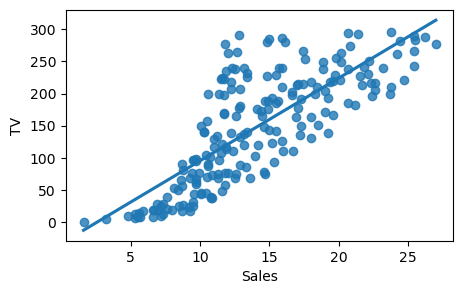

In [7]:
sns.regplot(data, x='Sales', y='TV', ci=None)
plt.gcf().set_size_inches(5,3)
plt.show()

In [8]:
dependent = data['Sales']
independent = data[['TV']]
independent = sm.add_constant(independent)

model = sm.OLS(dependent, independent).fit()
display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           1.47e-42
Time:                        21:36:16   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Significance of Parameters**
||||
|-|-|-|
|coef-const | $β_0$ |  $H_0$ is rejected since $p$ is less than $0.05$, coef value is significant. |
|coef-total_bill | $β_1$ | $H_0$ is rejected since $p$ is less than $0.05$, coef value is significant. |

**Significance of Model**

It is a test of the significance of all coefficients except $β_0$.

|||
|-|-|
| Model | $H_0$ is rejected since $p$ (Prob (F-statistic)) is less than $0.05$, model is significant.  |


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
Multiple Linear Regression </p>

In [12]:
dependent = data['Sales']
independent = data[['TV', 'Radio', 'Newspaper']]

independent = sm.add_constant(independent)
model = sm.OLS(dependent, independent).fit()
display(model.summary(slim=True))
# display(model.params)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
No. Observations:                 200   F-statistic:                     570.3
Covariance Type:            nonrobust   Prob (F-statistic):           1.58e-96
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

||||
|-|-|-|
|coef-const | $β_0$ |  $H_0$ is rejected since $p$ is less than $0.05$, coef value is significant. |
|coef-TV | $β_1$ | $H_0$ is rejected since $p$ is less than $0.05$, coef value is significant. |
|coef-Radio | $β_2$ | $H_0$ is rejected since $p$ is less than $0.05$, coef value is significant. |
|coef-Newspaper | $β_3$ | Since $p$ for **newspaper** is greater than $0.05$, $H_0$ cannot be rejected, it should be excluded from the model. |
| Model | | $H_0$ is rejected since $p$ (Prob (F-statistic)) is less than $0.05$, model is significant.  |


The adjusted $R^2$ value is 0.897, indicating that the data is explained fairly well.

$$Sales = 2.93 + 0.04 \cdot TV + 0.18 \cdot Radio - 0.001 Newspaper$$


In [14]:
dependent = data['Sales']
independent = data[['TV', 'Radio']]

independent = sm.add_constant(independent)
model = sm.OLS(dependent, independent).fit()
display(model.summary(slim=True))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
No. Observations:                 200   F-statistic:                     859.6
Covariance Type:            nonrobust   Prob (F-statistic):           4.83e-98
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

||||
|-|-|-|
|coef-const | $β_0$ |  $H_0$ is rejected since $p$ is less than $0.05$, coef value is significant. |
|coef-TV | $β_1$ | $H_0$ is rejected since $p$ is less than $0.05$, coef value is significant. |
|coef-Radio | $β_2$ | $H_0$ is rejected since $p$ is less than $0.05$, coef value is significant. |
| Model | | $H_0$ is rejected since $p$ (Prob (F-statistic)) is less than $0.05$, model is significant.  |


The adjusted $R^2$ value is 0.897, indicating that the data is explained fairly well.

$$Sales = 2.92 + 0.04 \cdot TV + 0.18 \cdot Radio$$

<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
1- Linearity Assumption </p>

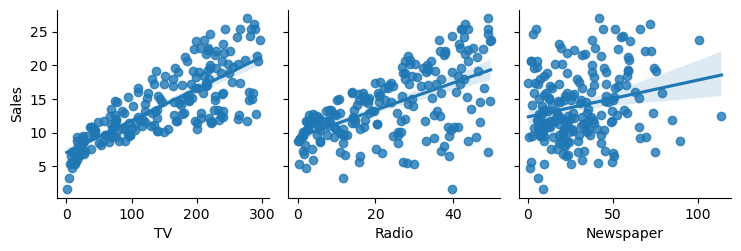

In [18]:
sns.pairplot(data, y_vars='Sales', x_vars=['TV', 'Radio', 'Newspaper'], kind='reg')
plt.show()

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
2- Normality Assumption </p>

In [20]:
# print(model.resid)
print(f'{model.resid.mean():.4f}')

0.0000


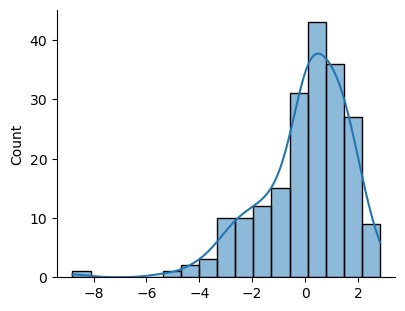

In [21]:
sns.displot(model.resid, kde=True)
plt.gcf().set_size_inches(4,3)
plt.show()

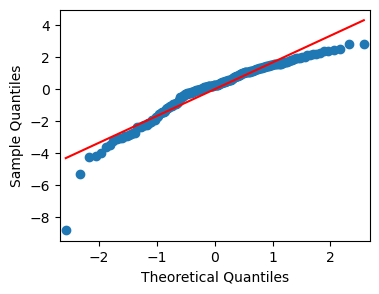

In [22]:
sm.qqplot(model.resid, line='s')
plt.gcf().set_size_inches(4,3)
plt.show()

Since the Prob(JB) value is less than $0.05$, $H_0$ is rejected. However, the graphs confirm a normal distribution. The Jarque-Bera test is sensitive to outliers or a small number of observations, which can lead to misleading results. Typically, a QQ plot is used.

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
3- Autocorrelation Assumption </p>

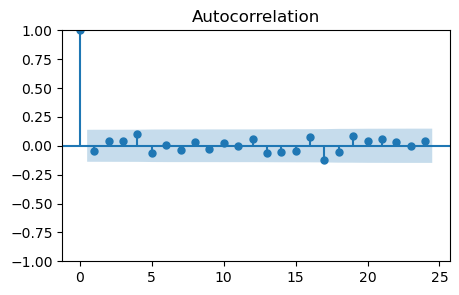

In [25]:
sm.graphics.tsa.plot_acf(model.resid) #lags=36
plt.gcf().set_size_inches(5,3)
plt.show()

Data within the marked area indicates no autocorrelation.

The **Durbin-Watson** statistic provides information about autocorrelation. Generally, a range of 1.5–2.5 indicates no problem with autocorrelation. From the Durbin-Watson table, you can read the lower limit ($d_l$) and upper limit ($d_u$) based on the sample size ($n$) and the number of independent variables ($k$, excluding the constant). Using these limits, you can calculate $4 - d_l$ and $4 - d_u$. The range between $d_l$ and $d_u$, and between $4 - d_l$ and $4 - d_u$, indicates indeterminate cases, while the interval outside these ranges indicates no autocorrelation.

In cases of indeterminacy, additional tests like the **Breusch-Godfrey LM** test can be applied.

In [28]:
lm, lmpval, fval, fpval = smd.acorr_breusch_godfrey(model, nlags=2)
print(lm, lmpval, fval, fpval)

0.6804174474024816 0.7116217749296754 0.33283584217940665 0.7172943226656876


Since lmpval is greater than $0.05$, $H_0$ cannot be rejected, there is no autocorrelation.

<p style="background-image: linear-gradient(#ee2965, #ffffff 10%); font-weight:bold;"> 
3.1- Newey-West Estimator </p>

In [31]:
DATA = pd.read_excel('data/16_newey_west.xlsx')
DEPENDENT = DATA['Y']
INDEPENDENT = DATA[['X1', 'X2', 'X3']]
INDEPENDENT = sm.add_constant(INDEPENDENT)

OLS_MODEL = sm.OLS(DEPENDENT, INDEPENDENT).fit()
display(OLS_MODEL.summary(slim=True))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.927
No. Observations:                  23   F-statistic:                     93.65
Covariance Type:            nonrobust   Prob (F-statistic):           1.45e-11
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.6472      3.650     10.589      0.000      31.008      46.286
X1             0.0109      0.002      4.567      0.000       0.006       0.016
X2            -0.5411      0.158     -3.425      0.003      -0.872      -0.210
X3             0.1741      0.063      2.784      0.012       0.043       0.305
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

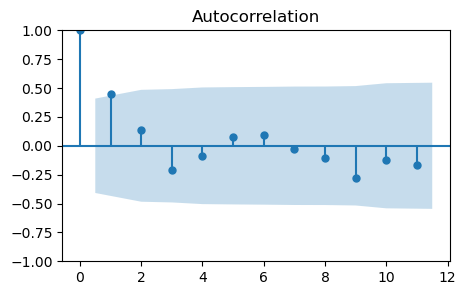

In [32]:
sm.graphics.tsa.plot_acf(OLS_MODEL.resid)
plt.gcf().set_size_inches(5,3)
plt.show()

In [33]:
lm, lmpval, fval, fpval = smd.acorr_breusch_godfrey(OLS_MODEL, nlags=2)
print(lm, lmpval, fval, fpval)

7.329304978094456 0.025613070559878815 3.975515586686938 0.03833218644763221


Since lmpval is less than $0.05$, $H_0$ is rejected, there is autocorrelation. Newey-West should be applied.

In [35]:
# NW_MODEL = OLS_MODEL.get_robustcov_results(cov_type='HAC', maxlags=3)
NW_MODEL = sm.OLS(DEPENDENT, INDEPENDENT).fit(cov_type='HAC', cov_kwds={'maxlags':3})
display(NW_MODEL.summary(slim=True))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.927
No. Observations:                  23   F-statistic:                     59.56
Covariance Type:                  HAC   Prob (F-statistic):           7.49e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.6472      3.542     10.912      0.000      31.706      45.589
X1             0.0109      0.002      6.832      0.000       0.008       0.014
X2            -0.5411      0.161     -3.369      0.001      -0.856      -0.226
X3             0.1741      0.055      3.151      0.002       0.066       0.282
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 3 lags and without small sample correction
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<p style="background-image: linear-gradient(to right, #ee2965, #e31837)"> &nbsp; </p>

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
4- Homoscedasticity Assumption </p>

In [38]:
white_test = smd.het_white(model.resid, model.model.exog)
print('white:', white_test)

BP_test = smd.het_breuschpagan(model.resid, model.model.exog)
print('pagan:', BP_test)

white: (64.52396767803721, 1.4067931342833322e-12, 18.479504477649087, 5.401631305047162e-15)
pagan: (4.809299865939587, 0.09029710011528749, 2.4269395850811146, 0.09094292734128774)


1. Since the final value is less than $0.05$, $H_0$ is rejected, there is not constant variance but changing variance.
2. $H_0$ cannot be rejected because the last value is greater than $0.05$, there is constant variance.

    **The White test and the Pagan test showed different results**<br>
    There were different results in the **White** and **Pagan** tests. If the normality test shows that errors follow a normal distribution, the Pagan test is more powerful. If normality is not satisfied, and the analysis continues based on the central limit theorem, the White test is applied.

<p style="background-image: linear-gradient(#ee2965, #ffffff 10%); font-weight:bold;"> 
4.1- Non-Constant Variance </p>

1. The Newey-West estimator can be applied.
2. A logarithmic transformation can be applied. The model is constructed by taking the logarithm of both the dependent and independent variables.

In [41]:
DATA = pd.read_csv('data/17_log.csv')
# display(DATA.T)

y = DATA['Y']
x = DATA['X']

x = sm.add_constant(x)
OLS_MODEL = sm.OLS(y, x).fit()
display(OLS_MODEL.summary(slim=True))

print('white test :', smd.het_white(OLS_MODEL.resid, OLS_MODEL.model.exog))
print('pagan test :', smd.het_breuschpagan(OLS_MODEL.resid, OLS_MODEL.model.exog))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.788
No. Observations:                  30   F-statistic:                     108.6
Covariance Type:            nonrobust   Prob (F-statistic):           3.86e-11
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7933      1.079      0.735      0.468      -1.417       3.004
X              0.0339      0.003     10.419      0.000       0.027       0.041
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

white test : (7.101394954910178, 0.028704611850957604, 4.186666904054256, 0.02607863875518798)
pagan test : (4.441885848078928, 0.03506749133320195, 4.866274679223998, 0.03576097948546619)


$H_0$ is rejected. Newey-West or Log Model transformation is applied

In [43]:
y = np.log(DATA['Y'])
x = np.log(DATA['X'])

x = sm.add_constant(x)
LOG_MODEL = sm.OLS(y, x).fit()
display(LOG_MODEL.summary(slim=True))

print('white test :', smd.het_white(LOG_MODEL.resid, LOG_MODEL.model.exog))
print('pagan test :', smd.het_breuschpagan(LOG_MODEL.resid, LOG_MODEL.model.exog))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.875
No. Observations:                  30   F-statistic:                     204.9
Covariance Type:            nonrobust   Prob (F-statistic):           2.09e-14
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9118      0.295     -6.484      0.000      -2.516      -1.308
X              0.7548      0.053     14.315      0.000       0.647       0.863
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

white test : (5.355370157510736, 0.0687220563084537, 2.9336004471752455, 0.07032570666146531)
pagan test : (2.6379691721564846, 0.10433683974726392, 2.6994756816522054, 0.11156580270896839)


<p style="background-image: linear-gradient(to right, #ee2965, #e31837)"> &nbsp; </p>

<p style="background-image: linear-gradient(#0aa98f, #ffffff 10%); font-weight:bold;"> 
5- Variance Inflation Factor </p>

In [46]:
data = pd.read_excel('data/18_vif.xlsx')

dependent = data['y']
independent = data.loc[:,'x1':'x10']
independent = sm.add_constant(independent)

model = sm.OLS(dependent, independent).fit()
display(model.summary(slim=True))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.974
No. Observations:                  20   F-statistic:                     72.78
Covariance Type:            nonrobust   Prob (F-statistic):           2.25e-07
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        790.9803    195.817      4.039      0.003     348.012    1233.949
x1             0.1849      0.106      1.744      0.115      -0.055       0.425
x2             0.0498      0.038      1.295      0.228      -0.037       0.137
x3            -0.0184      0.043     -0.431      0.676      -0.115       0.078
x4             0.0028      0.018      0.157      0.879      -0.037       0.043
x5             0.1189      0.053      2.257      0.050      -0.000       0.238
x6             0.1528      0.029      5.295      0.000       0.088       0.218
x7             0.0215      0.061      0.350      0.734      -0.118       0.161
x8             0.1945      0.058      3.326      0.009       0.062       0.327
x9             0.0798      0.071      1.119      0.292      -0.082       0.241
x10           -0.0043      0.073     -0.059      0.954      -0.169       0.160
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**1.** The warning given by the model: strong multicollinearity or other numerical problems.

**2.** A very high $R^2$ value is a suspicious situation.

**3.** When there is insignificance in the model coefficients (failure to reject $H_0$), but the model itself is significant (Prob (F-statistic)), this is another indication of multicollinearity.

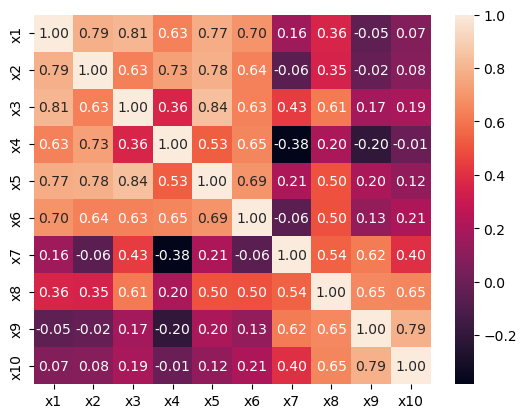

In [48]:
temp = independent.drop(columns='const')
correlation = temp.corr()

sns.heatmap(correlation, annot=True, fmt='.2f')
plt.show()

At first glance (in general) those above 0.7 are considered correlated, but **vif** testing is required. 

Above 5 indicates a problem in small data groups. Variable exclusion should be applied.

In [50]:
vif = pd.DataFrame()
vif['Variables'] = temp.columns
independent = sm.add_constant(independent)

vif['VIF'] = [variance_inflation_factor(independent.values, i+1) for i in range(temp.shape[1])]
display(vif.T)

,0,1,2,3,4,5,6,7,8,9
Variables,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
VIF,8.05592,4.979035,10.845798,4.229697,8.81622,3.866111,5.630836,4.840369,8.146069,4.456055


In [51]:
dependent = data['y']
independent = data.loc[:,'x1':'x10'].drop(columns='x3')
temp = sm.add_constant(independent)

model = sm.OLS(dependent, temp).fit()
# display(model.summary(slim=True))

vif = pd.DataFrame()
vif['Variables'] = independent.columns
vif['VIF'] = [variance_inflation_factor(temp.values, i+1) for i in range(independent.shape[1])]
display(vif.T)

,0,1,2,3,4,5,6,7,8
Variables,x1,x2,x4,x5,x6,x7,x8,x9,x10
VIF,6.92985,4.789882,3.903318,4.976143,3.771914,4.962766,3.958459,6.098086,4.221394


In [52]:
dependent = data['y']
independent = data.loc[:,'x1':'x10'].drop(columns=['x3', 'x1'])
temp = sm.add_constant(independent)

model = sm.OLS(dependent, temp).fit()
# display(model.summary(slim=True))

vif = pd.DataFrame()
vif['Variables'] = independent.columns
vif['VIF'] = [variance_inflation_factor(temp.values, i+1) for i in range(independent.shape[1])]
display(vif.T)

,0,1,2,3,4,5,6,7
Variables,x2,x4,x5,x6,x7,x8,x9,x10
VIF,4.264394,3.523401,4.49043,2.936866,2.762785,3.537053,4.41502,3.706561


In [53]:
dependent = data['y']
independent = data.loc[:,'x1':'x10'].drop(columns=['x3', 'x1', 'x5'])
temp = sm.add_constant(independent)

model = sm.OLS(dependent, temp).fit()
# display(model.summary(slim=True))

vif = pd.DataFrame()
vif['Variables'] = independent.columns
vif['VIF'] = [variance_inflation_factor(temp.values, i+1) for i in range(independent.shape[1])]
display(vif.T)

,0,1,2,3,4,5,6
Variables,x2,x4,x6,x7,x8,x9,x10
VIF,2.625903,3.522452,2.457397,2.61523,3.513733,4.114631,3.246545


<p style="background-image: linear-gradient(to right, #0aa98f, #68dab2)"> &nbsp; </p>